# <center>Parallel computing: fundamentals </center>

## =========================== Motivation ================================

### Moore's law
Moore's law states that the number of transistors that compose an integrated circuit would roughly double every two years, that is, it grows exponentially.
<img src="figures/parallelism_time.png" alt="Moore" style="width: 600px;"/>

### Physical miniaturization limits and energy consumption
A Si atom has a size of approximately $2\times10^{-10}\ $m, while a modern transistor has a size of $1\times10^{-8}$ m. As the size of the transistor approaches the atomic scale the possibility of building the device is lost, as the number of available atoms is not enough to capture the required structure.<br/>
<figure>
    <img src="figures/Ga2O3Trans.png" alt="Trans" style="width: 500px"/>
    <figcaption align="center">
        <b>Source: https://news.cornell.edu/stories/2018/06/vertical-gallium-oxide-transistor-high-power-efficiency</b>
    </figcaption>
</figure>

On the other hand, as more transistors are closely packaged the power consumption per unit area and the heat production increase. It has been observed that these effects can be decreased substantially by replacing a single powerful compute core by several, less powerful cores that share the workload.  
<img src="figures/power-curve.png" alt="Power" style="width: 600px"/>

### Memory access
Though computing power is increasing at a rate of approx. 60\% per year, the speed with which data can be accessed increases at a much lower rate (7\% per year).
<img src="figures/memory_access.png" alt="Power" style="width: 600px"/>

This means that if we access memory very often the processor spends a lot of idle time. To decrease the access to memory it is important to understand the hardware.

## ========== Concurrent, parallel, and distributed computing ===========

## Concurrent computing
Concurrency implies interruptibility. In concurrent computing, you have several tasks, but these tasks may not execute all the time because, from time to time, they need to wait for another task to finish. For example, a task od adding two numbers may have to wait for I/O operations to get the values it has to add and return the results.

### Example: Pipeline in a processor
A processor needs to carry out several steps every time it receives an instruction, and it usually has specialized units to carry out each step. For example:
- Fetch the instruction (IF).
- Decode the instruction (ID).
- Execute the instruction (EX).
- Read/write information in the memory (MEM).
- Write the result back (WB).

<figure>
<img src="figures/Nopipeline.png" style="width: 600px"/>
<figcaption align = "center"><span style="fontsize: 100px">CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=140175</span></figcaption>
</figure>
    
To prevent having its different units in an idle state while one of the units is carrying out its task, the work is pipelined:
<figure>
<img src="figures/Fivestagespipeline.png" style="width: 450px"/>
<figcaption align = "center"><span style="fontsize: 100px">CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=140175</span></figcaption>
</figure>
    
Note that in a pipeline all units work at the same time, but do different jobs. We say that the processor is executing several jobs **concurrently**. 
    
## Parallel computing
In parallel computing, we have one or more tasks and use several computing units in the same device (node). Each of the computing units is capable of executing any task or part of a task, so we assign a whole task or part of a task to each unit. All computing units execute their assigned tasks at the same time, i.e. in *parallel*.

<img src="figures/parallel_comp.png" style="width: 350px"/>

## Distributed computing
In distributed computing, we use several devices interconnected by a network. Each device can have one or more compute units. As in parallel computing, each device can execute tasks in parallel with the other, but the devices need now to communicate with one another to pass data between them through a network. As different devices might require to fetch or deliver data at particular moments, there has to be coordination in the communication between them. This coordination can be achieved by implementing a message-passing protocol.

<img src="figures/distributed_comp.png" style="width: 350px"/>

## ======================The CPU and Flynn's taxonomy ======================
A central processing unit (CPU), or processor, is composed of 3 main parts: An arithmetic logic unit (ALU), or *core*, that performs arithmetic calculations on data. A memory unit that stores the instructions, the data to be processed, and the results of the computations, and a control unit that dictates which instructions to carry out next and what data to read from the memory.

<img src="figures/CPU.png" style="width: 400px"/>

The architectures used in parallel and distributed computing are extensions and variations of the CPU model that contain several compute units, some of which might share memory or a control unit. These devices are classified according to the way in which the compute units and the memory are connected among themselves. This classification is known as **Flynn's taxonomy**, proposed by Michael Flynn in its current form in 1972. A revision of Flynn's taxonomy was carried out later by Ralph Duncan to include pipelined vector processes. We present now some of the most common architectures.

### Single instruction single data (SISD)
In the SISD architecture, we have a single processor that executes instructions one at a time.

<img src="figures/SISD.png" style="width: 200px"/>

### Single instruction multiple data (SIMD)
In this architecture, several cores share the same control unit. A single instruction is broadcasted to all the ALUs. The data is then partitioned and each processor executes the instruction using a different part of the data.

<img src="figures/SIMD.png" style="width: 500px"/>

### Multimple instruction multiple data (MIMD)
This architecture consists of several processors, each one with its own control unit, so that they can perform different instructions in parallel. This is the most common architecture.

<img src="figures/MIMD.png" style="width: 700px"/>

## Processes and threads

A **process** is an instance of a program that is assigned to a device, along with the data needed and access to the shared memory. A process consists of the following:
- A process ID assigned by the operating system.
- Access to a section of the memory to read/write data (virtual address space). The code and the data are located in the memory.
- One or more *threads* that execute the code.
- IO handles.


A **thread**  is the part of a process that executes the instructions. It has a program counter, a set of registers, and memory (stack) assigned to it to store instructions and data locally.

<img src="figures/process.png" style="width: 400px"/>

## Fork-join model
In the fork-join model, the code is divided into different regions. A region can be sequential or parallel, depending on the number of threads that are executed. In a sequential region, a single thread executes the code, while in a parallel region, multiple threads execute, usually the same code with different data.

<img src="figures/fj_model.png" style="width: 500px"/>

Sequential regions usually run code that cannot be parallelized because of strict dependencies between operations. Once a parallelizable region of the code is reached, a fork operation creates several threads and assigns a copy of the code, as well as a chunk of data, to each one. Once all threads have finished their jobs, a join operation retrieves the output data from each thread and destroys it, leaving a single thread in charge again.

## ===================== Example of parallelism ===========================
Now we proceed to look at a simple example of parallelism, in which we create multiple threads for a single process in order to perform a series of tasks in parallel.<br>

Let's start by defining a simple task:

<div class="alert alert-success">

`task1.py`
```python
from time import sleep

def task(n):
    print('Starting task {0}...'.format(n))
    sleep(1)
    print('Task {0}: done'.format(n))
```
</div>

### Single process, single thread
We now execute the task a couple of times and measure how much time it takes for the process to complete, using the single thread it creates by default.

<div class="alert alert-success">
    
`example1.py`
```python
from time import perf_counter
from task1 import task
    
start_time = perf_counter() #Clock with the highest available resolution

task(0)
task(1)

end_time = perf_counter()

print("Time: {0}".format(end_time-start_time))
```
</div>

In [15]:
!python3 code/example1.py

Starting task 0...
Task 0: done
Starting task 1...
Task 1: done
Time: 2.002083954000227


### Single process, multiple threads
Now, we proceed to ask the process to create more threads, and we assign to each one of them a single task to perform. 

Two threads:

<div class="alert alert-success">
    
    
`example2.py`
```python
from time import perf_counter
from threading import Thread
from task1 import task
    
start_time = perf_counter()

# Create two threads, each one with a task function
t0 = Thread(target=task, args=(0,))
t1 = Thread(target=task, args=(1,))

# Start the threads
t0.start()
t1.start()

# Wait for the threads to complete
t0.join()
t1.join()

end_time = perf_counter()

print("Time: {0}".format(end_time-start_time))
```

In [16]:
!python3 code/example2.py

Starting task 0...
Starting task 1...
Task 1: done
Task 0: done
Time: 1.0008188530000552


-------------------------------------

### Exercise 1
Repeat the previous example but using eight threads (Hint: the Thread objects can be stored in a python list):

In [18]:
!python3 exercises/exercise1.py

Time: 2.359997779421974e-07


------------------------------------

Note that in the previous examples when launching $n$ threads the time reduction is almost $n$-fold. However, this level of efficiency can only be attained as long as the following requirements are met:
- The tasks can be performed in a parallel fashion, that is, the input of a task is independent of the output of all others. 
- There are enough computing units to carry out each task simultaneously.
- The time it takes for a task to complete is much longer than the time it takes to create, start and join a thread.

If you execute the previous code cell several times you might note also that the threads do not necessarily complete their tasks in order, and in some cases, a thread might finish even before others have been started.

### Race conditions
We will now observe what happens when the result of one task depends on the actions taken by other tasks. To do this we take a simple example: incrementing the value of a global (shared) variable $x$.

<div class="alert alert-success">

`example3.py`
```python
from time import sleep, perf_counter

x = 0

def increment_variable(n):
    global x
        
    sleep(1)
    local_x = x
    print("Task {0}: Adding 1 to x={1}".format(n, x))
    local_x += 1
    x = local_x
    print("Task {0}: Finished. x={1}".format(n,x))

#------------------------------------------------------------------
print("Initial x={0}\n".format(x))

start_time = perf_counter()

for i in range(8):
    increment_variable(i)

end_time = perf_counter()

print("\nFinal x={0}".format(x))
print("Time: {0}".format(end_time-start_time))
```
</div>

In [14]:
!python3 code/example3.py

Initial x=0

Task 0: Adding 1 to x=0
Task 0: Finished. x=1
Task 1: Adding 1 to x=1
Task 1: Finished. x=2
Task 2: Adding 1 to x=2
Task 2: Finished. x=3
Task 3: Adding 1 to x=3
Task 3: Finished. x=4
Task 4: Adding 1 to x=4
Task 4: Finished. x=5
Task 5: Adding 1 to x=5
Task 5: Finished. x=6
Task 6: Adding 1 to x=6
Task 6: Finished. x=7
Task 7: Adding 1 to x=7
Task 7: Finished. x=8

Final x=8
Time: 8.008035375999953


The previous serial code works as expected, where the first task takes the current value of $x=0$, adds $1$ to obtain $x=1$, which is taken by the second task and is incremented to $2$ and so on, until the final task takes a $7$ and adds $1$ to get the final correct result $x=8$, in approximately 8 seconds.

<div class="alert alert-success">

`example4.py`
```python
from time import sleep, perf_counter
from threading import Thread
    
x = 0

def increment_variable(n):
    global x
        
    sleep(1)
    local_x = x
    print("Task {0}: Adding 1 to x={1}".format(n, x))
    local_x += 1
    x = local_x
    print("Task {0}: Finished. x={1}".format(n,x))

#------------------------------------------------------------------
print("Initial x={0}\n".format(x))

start_time = perf_counter()

# Create 8 threads, each one with a task function
threads = []
for i in range(8):
    threads.append(Thread(target=increment_variable, args=(i,)))

# Start the threads
for thr in threads:
    thr.start()

# Wait for the threads to complete
for thr in threads:
    thr.join()

end_time = perf_counter()

print("\nFinal x={0}".format(x))
print("Time: {0}".format(end_time-start_time))
```
</div>

In [22]:
!python3 code/example4.py

Initial x=0

Task 0: Adding 1 to x=0
Task 0: Finished. x=1
Task 3: Adding 1 to x=0
Task 2: Adding 1 to x=1
Task 2: Finished. x=2
Task 4: Adding 1 to x=1
Task 1: Adding 1 to x=1
Task 3: Finished. x=1
Task 7: Adding 1 to x=1
Task 7: Finished. x=2
Task 1: Finished. x=2
Task 5: Adding 1 to x=1
Task 4: Finished. x=2
Task 5: Finished. x=2
Task 6: Adding 1 to x=1
Task 6: Finished. x=2

Final x=2
Time: 1.0035055250000369


By executing the previous cell multiple times you might find, perhaps with surprise, that in some cases the final result $x<8$ ! For example, we might observe the following output:<br><br>

<pre><code>Initial x=0

Task 0: Adding 1 to x=0Task 1: Adding 1 to x=0
Task 1: Finished. x=1
Task 2: Adding 1 to x=1
Task 2: Finished. x=2
Task 5: Adding 1 to x=2
Task 5: Finished. x=3
Task 3: Adding 1 to x=3
Task 3: Finished. x=4
Task 4: Adding 1 to x=4
Task 4: Finished. x=5

Task 0: Finished. x=1
Task 6: Adding 1 to x=1
Task 6: Finished. x=2
Task 7: Adding 1 to x=2
Task 7: Finished. x=3

Final x=3
Time: 1.0039066870231181
</code></pre>

We obtained the result in 1/8 of the time it took the serial code to run, but the result is incorrect. Why is this? <br>

By looking carefully at the output we see that threads 0 and 1 started first and both took as input an initial value $x=0$, added $1$, and wrote the result $1$ back to $x$. Note that by this point two tasks have been executed but $x=1$, when it should have been $2$. In a similar way, threads 2 and 6 take $x$ as input when its value is $1$ and write back a value $x=2$, so 4 tasks have been executed already and the result is $x=2$, when it should have been $4$.<br>

The problem lies then in the possibility of having more than one thread updating the shared variable at the same time. This kind of problem is called a *race condition*, as the threads compete to get first to a shared variable and modify it. 

### Thread lock
In order to prevent more than one thread from accessing the same memory space at the same time, we can *lock* a section of code. Only a single thread can be executing a *locked* section of code at the same time, meaning that the other threads have to wait until the current thread is finished to be able to execute it themselves.<br>

We will create a Lock object and use it to lock the code inside the increment_variable function.

<div class="alert alert-success">

`example5.py`
```python
from time import sleep, perf_counter
from threading import Thread, Lock

x = 0

def increment_variable(n, lock):
    global x
    
    lock.acquire() #Start of the locked region
    
    sleep(1)
    local_x = x
    print("Task {0}: Adding 1 to x={1}".format(n, x))
    local_x += 1
    x = local_x
    print("Task {0}: Finished. x={1}".format(n,x))

    lock.release() #End of the locked region
    
#------------------------------------------------------------------
print("Initial x={0}\n".format(x))

#create Lock object
lock = Lock()

start_time = perf_counter()

# Create 8 threads, each one with a task function
threads = []
for i in range(8):
    threads.append(Thread(target=increment_variable, args=(i,lock)))

# Start the threads
for thr in threads:
    thr.start()

# Wait for the threads to complete
for thr in threads:
    thr.join()

end_time = perf_counter()

print("\nFinal x={0}".format(x))
print("Time: {0}".format(end_time-start_time))
```
</div>

In [24]:
!python3 code/example5.py

Initial x=0

Task 0: Adding 1 to x=0
Task 0: Finished. x=1
Task 1: Adding 1 to x=1
Task 1: Finished. x=2
Task 2: Adding 1 to x=2
Task 2: Finished. x=3
Task 3: Adding 1 to x=3
Task 3: Finished. x=4
Task 4: Adding 1 to x=4
Task 4: Finished. x=5
Task 5: Adding 1 to x=5
Task 5: Finished. x=6
Task 6: Adding 1 to x=6
Task 6: Finished. x=7
Task 7: Adding 1 to x=7
Task 7: Finished. x=8

Final x=8
Time: 8.010315277999325


We see now that the code gives the correct output every time, but it takes the same time as the serial code, which beats the purpose of our parallelization. The reason why this happens is that we have included all the code of the function in the locked region, and the threads have to wait for a full second every time another thread enters the locked region. If we manage to keep just the critical section of code where the race condition is present, we might get back some of the efficiency of our parallelization.    

---------------------------------------

### Exercise 2
Taking out of the locked region all the code that does not present a race condition problem and reduce the execution time, while ensuring the correctness of the result! 

In [28]:
!python3 exercises/exercise2.py

Initial x=0


Final x=0
Time: 0.0007650680054211989


---------------------------------------------

## ============================= Performance =============================

### Terms
- **$N$:** Number of software threads.
- **$P$:** Number of compute units.
- **$T_P$:** Execution time using $P$ parallel compute units.
- **$T_{\infty}$:** Execution time when $P\rightarrow\infty$.
- **$T_{sec}$:** Sequential execution time. It refers to the time that takes to execute the parts of the program which are not parallelizable.
- **$T_{oh}$:** Overhead time. It refers to the extra computing time invested in tasks like creating and destroying threads, partitioning, copying and loading data for thread use, etc. 

Note that $N$ and $P$ are different concepts. If $N<P$ then some of the compute units remain idle during the computation. If $N=P$, each thread runs on a compute unit (hardware thread). If $N>P$, some threads will have to wait until a compute unit becomes available to execute them.<br>

### Performance metrics for parallelism
- **Span:** $T_{\infty}$. Execution time is the smallest when the maximum number of threads that can run the program simultaneously can do so on a separate compute unit: $P\rightarrow\infty$, then $T_P\geq T_{\infty}$.
- **Speedup:** $T_1/T_P$. At most, speedup grows linearly with $P$: $T_1/T_P=\Theta(P)$. 
- **Parallelism:** $T_1/T_\infty$. Is the maximum theoretical speedup.
- **Work:** $PT_P$. It is minimum when $P=1$, so $T_P\geq T_1/P$.
- **Efficiency:** $T_1/(PT_P)$. 


### Ahmdal's argument
Define the serial fraction:
$$\gamma=\frac{T_{sec}}{T_1},$$
then
$$T_P=T_{sec}+\frac{1}{P}(T_1-T_{sec})+T_{oh}$$
which, in terms of the serial fraction gives
$$T_P=T_1\left(\gamma+\frac{1}{P}(1-\gamma)+\gamma_{oh}\right),$$
where $\gamma_{oh}=T_{oh}/T_1$.<br>

This means that the speedup $S(P)$ when using $P$ computing units is
$$S(P)=\frac{1}{\gamma+(1-\gamma)/P+\gamma_{oh}}.$$
Lineal speedup is attained when $\gamma\rightarrow 0$ and $\gamma_{oh}\rightarrow 0$.<br>

#### Plotting the theoretical speedup
Here, $n$ represents the size of the problem. In the following plot, the size of both the sequential and parallel regions grows as $n$:

<img src="figures/speedup-1.png" width=600/>

In the next plot, the size of the sequential region remains constant while the size of the parallel region grows as $n$:

<img src="figures/speedup1-1.png" width=600/>

## ========================= Speedup experiment ==========================

### Sequential program

<div class="alert alert-success">

`seq_add.py`
```python
from time import sleep, perf_counter

# Sequential vector addition
def vector_sum(v1, v2):
    try: 
        if len(v1) != len(v2):
            raise Exception('The two vectors do not have the same number of elements.')
        res = [0 for i in range(len(v1))]
        
        for i in range(len(v1)):
            sleep(delay)
            res[i] = v1[i] + v2[i]
            
        return res
    
    except Exception as error:
        print(error)
        
# Measure the average execution time of a sequential run
def seq_run(v1, v2, Ntrials):
    start_time = perf_counter()
    for i in range(Ntrials):
        res = vector_sum(v1,v2)
    end_time = perf_counter()
        
    return res, (end_time-start_time)/Ntrials
```
</div>

### Parallel program

<div class="alert alert-success">

`paral_add.py`
```python
from time import sleep, perf_counter
from threading import Thread

# Add vector's elements from ini to fin-1
def add(x, y, z, ini, fin):
    for i in range(ini, fin):
        sleep(delay)
        z[i] = x[i] + y[i]

# Parallelized vector addition
def par_vector_sum(v1, v2, n_thr):
    try: 
        if len(v1) != len(v2):
            raise Exception('The two vectors do not have the same number of elements.')
        res = [0 for i in range(len(v1))]
        
        n_thr = min(n_thr, len(v1)) #Number of threds <= length of the vectors
        
        chunk_size = len(v1) // n_thr + 1 #No. of tasks for each thread
        
        #Create the threads
        threads = []
        for i in range(n_thr):
            ini = i*chunk_size
            fin = min(ini + chunk_size, len(v1))
            threads.append(Thread(target=add, args=(v1, v2, res, ini, fin)))
        
        # Start the threads
        for thr in threads:
            thr.start()

        # Wait for the threads to complete
        for thr in threads:
            thr.join()
        return res, n_thr
    
    except Exception as error:
        print(error)
    
# Measure the average execution time of a parallel run
def par_run(v1, v2, Ntrials, n_thr):
    start_time = perf_counter()
    for i in range(Ntrials):
        res, n_thr = par_vector_sum(v1,v2,n_thr)
    end_time = perf_counter()
    
    return res, (end_time-start_time)/Ntrials
```
</div>

### Test

<div class="alert alert-success">

`example6.py`
```python
from seq_add import seq_run

# Sequential test

# Declare and initialize the input
sz = 1000
v1 = [1 for i in range(sz)]
v2 = [2 for i in range(sz)]

Ntrials = 100

res, seq_time = seq_run(v1, v2, Ntrials)

##Check result
assert res == [3 for i in range(sz)]

print("Secuential addition.")
print("Time: {0:.7f}".format(seq_time))
```
</div>

In [31]:
!python3 code/example6.py

Secuential addition.
Time: 0.0770231


<div class="alert alert-success">

`example7.py`
```python
from sys import argv
from paral_add import par_run

# Parallel test

code, seq_time = argv
seq_time = float(seq_time)

# Declare and initialize the input
sz = 1000
v1 = [1 for i in range(sz)]
v2 = [2 for i in range(sz)]

Ntrials = 100

#Number of threads
nt = 4
res, par_time = par_run(v1, v2, Ntrials, nt)

##Check result
assert res == [3 for i in range(sz)]

print("No. of threds: {0}".format(nt))
print("Time: {0:.7f}".format(par_time))
print("Speedup: {0:.3f}".format(seq_time/par_time))
```
</div>

In [33]:
!python3 code/example7.py 0.0770231

No. of threds: 4
Time: 0.0201630
Speedup: 3.820


### Plot speedup

<div class="alert alert-success">

`speedup.py`
```python
import matplotlib.pyplot as plt
from seq_add import seq_run
from paral_add import par_run
from matplotlib import rc
rc('text',usetex=True)

# Declare and initialize the input
sz = 1000
v1 = [1 for i in range(sz)]
v2 = [2 for i in range(sz)]
Ntrials = 100

#Perform the computations for  different number of cores
res, seq_time = seq_run(v1, v2, Ntrials)

speedups = []
procs = [i for i in range(1,7)]
for P in procs:
    res, par_time = par_run(v1, v2, Ntrials, P)
    speedups.append(seq_time/par_time)
```
</div>

In [42]:
!python3 code/speedup.py

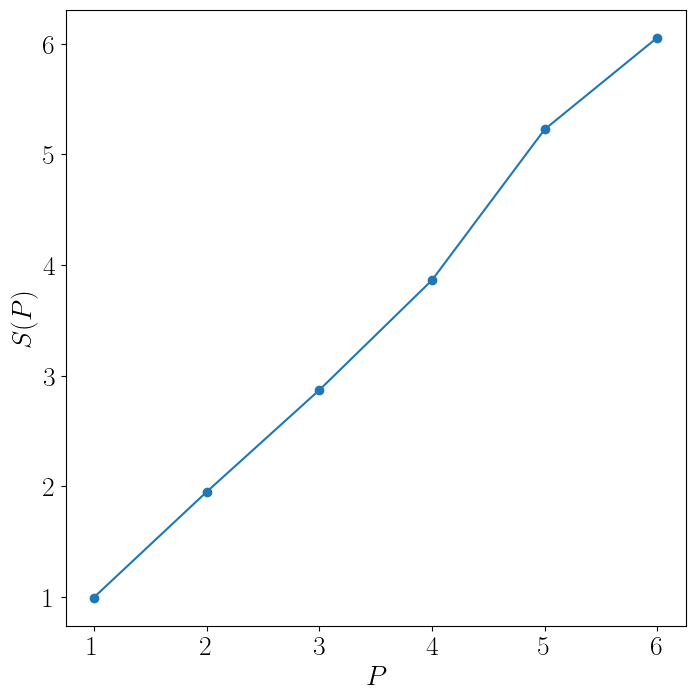

In [43]:
#Load data
procs = []
speedups = []
with open("code/spdup_data.dat", "r") as ifile:
    for line in ifile:
        v = list(map(float, line.split()))
        procs.append(v[0])
        speedups.append(v[1])

#Plot data
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(procs, speedups, marker='o')
ax.set_xlabel(r"$P$", fontsize=20)
ax.set_ylabel(r"$S(P)$", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)

## ================ Exercise: Counting 3s ==================

**Problem:** We have a list of integers ```l``` which contains numbers between 0 and 3. We are interested in counting the number of 3s contained in the list, so for example, if the list is:<br>

```3,1,2,0,1,3,2,3,1,2,0```

then the result is 3, because there are three 3s in the list.<br>

The following code counts the number of 3s contained on a list ```l```$:

<div class="alert alert-success">
    
`count_3s_seq.py`
```python
from time import sleep, perf_counter

#Read the list of numbers from a file
def read_list():
    l = []
    with open("exercises/list.dat","r") as infile:
        l = list(map(int,infile.read().split()))
    return l

#Count the number of 3s in list l and store the result on count
def count3s(l, count):
    for i in range(len(l)):
        sleep(1.e-3)
        if l[i] == 3:
            count[0] += 1  
            
#------------------------------------------------------
l = read_list()
    
count = [0]
t_start = perf_counter()
count3s(l, count)
t_stop = perf_counter()

print("Time: {0} s.".format(t_stop-t_start))
print("Number of 3s counted: {0}".format(count[0]))
```
</div>

In [50]:
!python3 exercises/count_3s_seq.py

Time: 0.11234556899580639 s.
Number of 3s counted: 24


**Note** that the ```count3s``` function sleeps for a milisecond every time it checks if a number is a 3 or not. We do this because the task of checking a number is very small and python's threading module is not very optimized, so we artificially inflate the size of the task to observe a decrease in execution time.

### Exercise:
The goal is to parallelize the task of counting 3s in a list ```l```. To do this we will create 4 threads and split ```l``` in 4 chuncks of approximate size ```(len(l)+1)//4```. Each thread will be given a different chink and it will count the number of 3s in it's corresponding chunk. The result that each thread obtains will be added to a variable ```count``` where the result with the total number of 3s will be stored.<br>

The following figure shows how the list has been split between the four threads:

<img src="figures/listl.png" width=400>

Note that in some cases the last thread will have a chunck size different to the others.

### Hints:
- Set the size of the chink as ```(len(l)+1)//4```.
- One can take a slice of a python list ```l``` by writing ```l[ini:fin]```, where ```ini``` refers to the index of the first element of the chunk, and ```fin``` to the index after the last element of the chunk.
- Create two functions: ```count3s(l, count)``` which receives the list and the global counter and creates and launches the threads, and ```count3s_thread(chunk, count, lock)``` which receives a chunk of the list, the global counter, and a lock, goes throught the chunk and counts how many 3s does it find in it, and finally adds this number to the global result.
- Remember to avoid race conditions by using a lock. Create a private counter within the thread function to acumulate the partial result. Then, accumulate the partial result to the global result.

In [55]:
!python3 exercises/count_3s_par.py

  File "/home/carlos/Documents/cybercolombia/repo/hpcsummer2023/material/Track0/exercises/count_3s_par.py", line 20
    def count3s(l, count):
    ^
IndentationError: expected an indented block after function definition on line 11
